In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [115]:
df=pd.read_csv('D:\Data_Science\March\healthcare-dataset-stroke-data.csv')

In [116]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [118]:
df.shape

(5110, 12)

In [119]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [120]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [121]:
df=df.drop('id',axis=1)

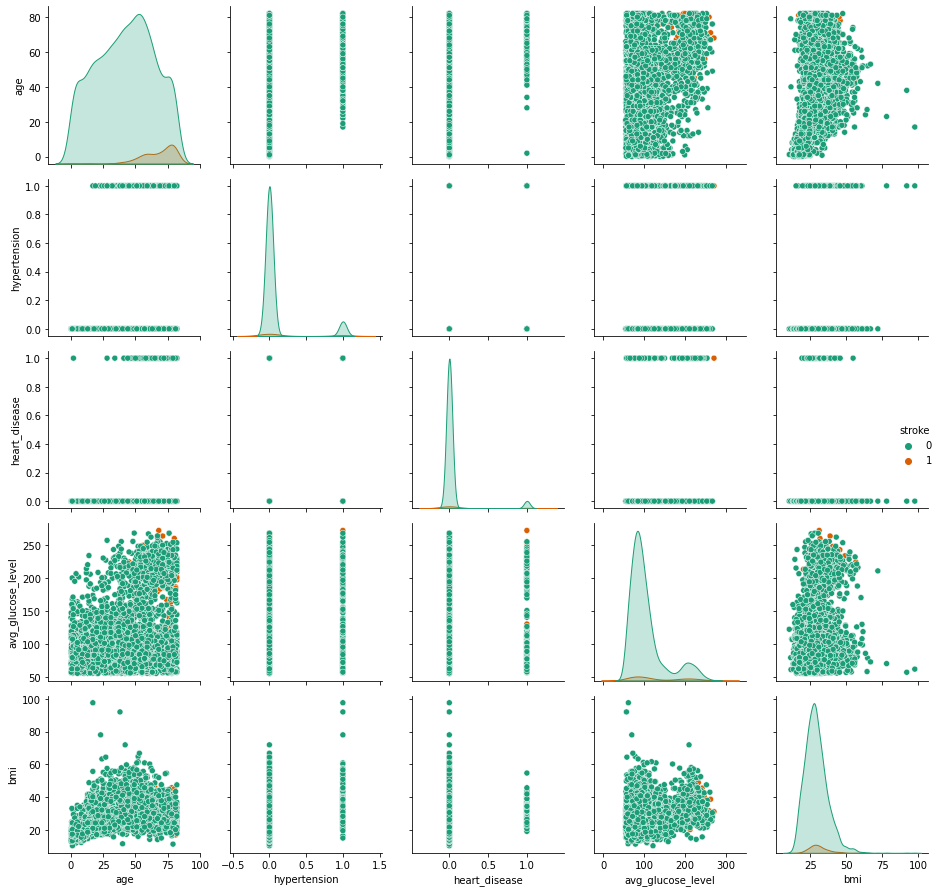

In [122]:
sns.pairplot(df,hue='stroke',palette='Dark2')
plt.tight_layout()

In [123]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

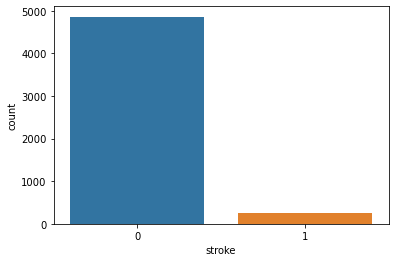

In [124]:
sns.countplot(x='stroke',data=df)

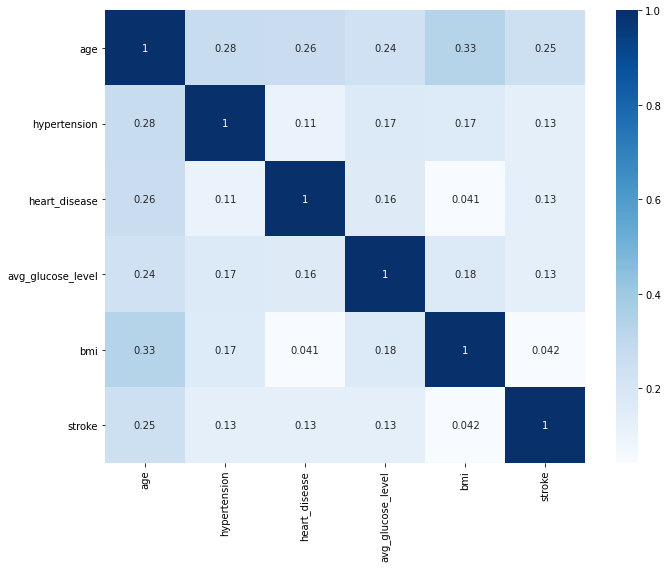

In [125]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.tight_layout()


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [127]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

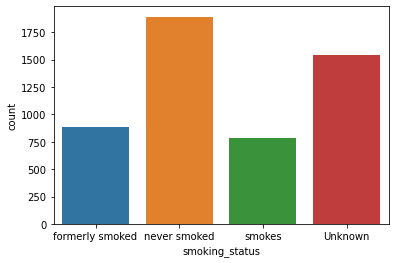

In [128]:
sns.countplot(x='smoking_status',data=df)

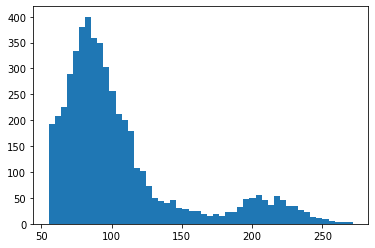

In [129]:
plt.hist(df.avg_glucose_level,bins=50)
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

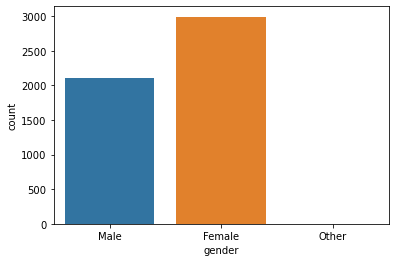

In [130]:
sns.countplot(x='gender',data=df)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

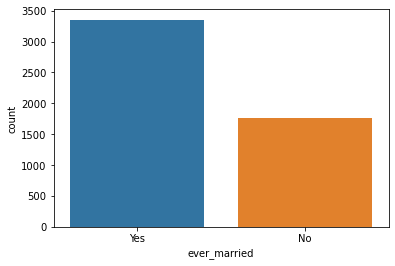

In [131]:
sns.countplot(x='ever_married',data=df)

<AxesSubplot:xlabel='work_type', ylabel='count'>

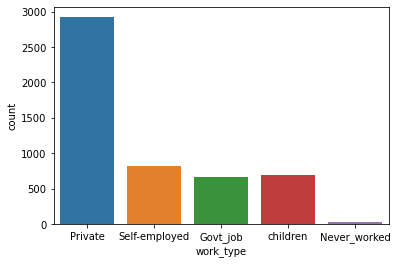

In [132]:
sns.countplot(x='work_type',data=df)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

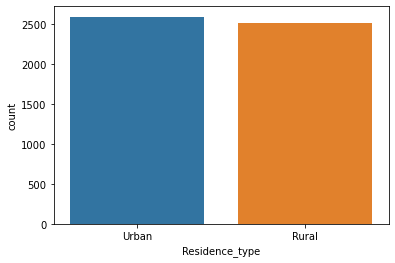

In [133]:
sns.countplot(x='Residence_type',data=df)

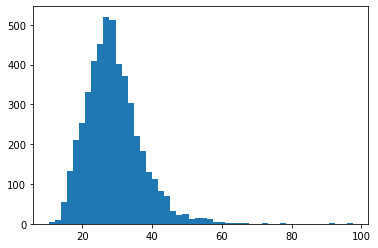

In [134]:
plt.hist(df.bmi,bins=50)
plt.show()

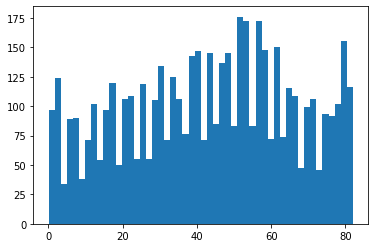

In [135]:
plt.hist(df.age,bins=50)
plt.show()

In [136]:
df.bmi.value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [137]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [138]:
cat_cols=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
num_cols=['age','avg_glucose_level','bmi']

In [139]:
for feat in df[cat_cols].columns:
    print('\n')
    print('column name:',feat)
    print('Unique values:',df[feat].unique())
    print(df[feat].value_counts())
    print('\n')



column name: gender
Unique values: ['Male' 'Female' 'Other']
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64




column name: hypertension
Unique values: [0 1]
0    4612
1     498
Name: hypertension, dtype: int64




column name: heart_disease
Unique values: [1 0]
0    4834
1     276
Name: heart_disease, dtype: int64




column name: ever_married
Unique values: ['Yes' 'No']
Yes    3353
No     1757
Name: ever_married, dtype: int64




column name: work_type
Unique values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64




column name: Residence_type
Unique values: ['Urban' 'Rural']
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64




column name: smoking_status
Unique values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
never smoked       1892
Unknown            1544
formerly smoked 

In [140]:
#mapping
df['gender']=df.gender.map({'Male':0,'Female':1,'Other':2})
df['smoking_status']=df.smoking_status.map({'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3})
df['Residence_type']=df.Residence_type.map({'Urban':0,'Rural':1})
df['work_type']=df.work_type.map({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})
df['ever_married']=df.ever_married.map({'Yes':0,'No':1})

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [142]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [143]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,1,61.0,0,0,0,1,1,202.21,NaN,1,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1


In [145]:
df['bmi']=df.bmi.fillna(df['bmi'].mean())

In [146]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [147]:
#Data Split
x=df.drop('stroke',axis=1)
y=df['stroke']

In [148]:
x.shape

(5110, 10)

In [149]:
y.shape

(5110,)

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [151]:
x_train.shape

(3577, 10)

In [152]:
y_train.shape

(3577,)

In [154]:
sm=SMOTE(random_state=20)
x_train,y_train=sm.fit_resample(x_train,y_train)

In [155]:
x_train.shape

(6834, 10)

In [156]:
y_train.shape

(6834,)

In [161]:
#Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

dtc_train_predict=dtc.predict(x_train)
dtc_test_predict=dtc.predict(x_test)

dtc_train_score=dtc.score(x_train,y_train)
dtc_test_score=dtc.score(x_test,y_test)

dtc_f1_score=metrics.f1_score(y_test,dtc_test_predict)

print('Accuracy on train set:',dtc_train_score)
print('Accuracy on test set:',dtc_test_score)
print('f1_score:',dtc_f1_score)
print('Classification report:')
print(metrics.classification_report(y_test,dtc_test_predict))


Accuracy on train set: 1.0
Accuracy on test set: 0.867579908675799
f1_score: 0.13617021276595745
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1444
           1       0.11      0.18      0.14        89

    accuracy                           0.87      1533
   macro avg       0.53      0.54      0.53      1533
weighted avg       0.90      0.87      0.88      1533



In [162]:
from sklearn.ensemble import RandomForestClassifier

#Create a model
rfc=RandomForestClassifier()

#Fit the model
rfc.fit(x_train,y_train)

#predict on Train and test test
rfc_train_predict=rfc.predict(x_train)
rfc_test_predict=rfc.predict(x_test)

#Accuracy Score
rfc_train_score=rfc.score(x_train,y_train)
rfc_test_score=rfc.score(x_test,y_test)

#f1 score
rfc_f1_score=metrics.f1_score(y_test,rfc_test_predict)

print('Accuracy on train set:',rfc_train_score)
print('Accuracy on test set:',rfc_test_score)
print('f1_score:',rfc_f1_score)
print('Classification report:')
print(metrics.classification_report(y_test,rfc_test_predict))

Accuracy on train set: 1.0
Accuracy on test set: 0.9008480104370515
f1_score: 0.19148936170212766
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1444
           1       0.18      0.20      0.19        89

    accuracy                           0.90      1533
   macro avg       0.57      0.57      0.57      1533
weighted avg       0.91      0.90      0.90      1533



In [163]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

lr_train_predict=lr.predict(x_train)
lr_test_predict=lr.predict(x_test)

lr_train_score=lr.score(x_train,y_train)
lr_test_score=lr.score(x_test,y_test)
lr_f1_score=metrics.f1_score(y_test,lr_test_predict)

print('Accuracy on train set:',lr_train_score)
print('Accuracy on test set:',lr_test_score)
print('f1_score:',lr_f1_score)
print('Classification report:')
print(metrics.classification_report(y_test,lr_test_predict))

Accuracy on train set: 0.8192859233245537
Accuracy on test set: 0.7932159165035877
f1_score: 0.24343675417661098
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1444
           1       0.15      0.57      0.24        89

    accuracy                           0.79      1533
   macro avg       0.56      0.69      0.56      1533
weighted avg       0.92      0.79      0.84      1533



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [165]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Create a model
LDA=LinearDiscriminantAnalysis(solver='svd')

#Fit the model
LDA.fit(x_train,y_train)

#predict on Train and test test
LDA_train_predict=LDA.predict(x_train)
LDA_test_predict=LDA.predict(x_test)

#Accuracy Score
LDA_train_score=LDA.score(x_train,y_train)
LDA_test_score=LDA.score(x_test,y_test)

#f1 score
LDA_f1_score=metrics.f1_score(y_test,LDA_test_predict)

print('Accuracy on train set:',LDA_train_score)
print('Accuracy on test set:',LDA_test_score)
print('f1_score:',LDA_f1_score)
print('Classification report:')
print(metrics.classification_report(y_test,LDA_test_predict))

Accuracy on train set: 0.813579163008487
Accuracy on test set: 0.7742987606001305
f1_score: 0.2445414847161572
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1444
           1       0.15      0.63      0.24        89

    accuracy                           0.77      1533
   macro avg       0.56      0.71      0.56      1533
weighted avg       0.92      0.77      0.83      1533



In [166]:
from sklearn.naive_bayes import GaussianNB

#Create a model
gb=GaussianNB()
#Fit the model
gb.fit(x_train,y_train)

#predict on Train and test test
gb_train_predict=gb.predict(x_train)
gb_test_predict=gb.predict(x_test)

#Accuracy Score
gb_train_score=gb.score(x_train,y_train)
gb_test_score=gb.score(x_test,y_test)

#f1 score
gb_f1_score=metrics.f1_score(y_test,gb_test_predict)

print('Accuracy on train set:',gb_train_score)
print('Accuracy on test set:',gb_test_score)
print('f1_score:',gb_f1_score)
print('Classification report:')
print(metrics.classification_report(y_test,gb_test_predict))

Accuracy on train set: 0.7966052092478783
Accuracy on test set: 0.6666666666666666
f1_score: 0.1952755905511811
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79      1444
           1       0.11      0.70      0.20        89

    accuracy                           0.67      1533
   macro avg       0.54      0.68      0.49      1533
weighted avg       0.92      0.67      0.76      1533



In [168]:
#Tuning the DecisionTree model

from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [7,10],
            'max_features':[4,5,6],
           'min_samples_split':[90,100],
           'min_samples_leaf':[20,30]}

DT=DecisionTreeClassifier()
DT_tune=GridSearchCV(DT,param_grid=parameters,cv=3)
DT_tune.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [20, 30],
                         'min_samples_split': [90, 100]})

In [169]:
DT_tune.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 20,
 'min_samples_split': 100}

In [170]:
dt=DecisionTreeClassifier(max_depth=10,max_features=6,min_samples_leaf=20,min_samples_split=100)

#fit the model
dt.fit(x_train,y_train)

#train and test predictions
dt_train_predict=dt.predict(x_train)
dt_test_predict=dt.predict(x_test)

#train and test scores
dt_train_score=dt.score(x_train,y_train)
dt_test_score=dt.score(x_test,y_test)

dt_f1_score=metrics.f1_score(y_test,dt_test_predict)

print('Accuracy on train set:',dt_train_score)
print('Accuracy on test set:',dt_test_score)
print('f1_score:',dt_f1_score)
print('Classification report:')
print(metrics.classification_report(y_test,dt_test_predict))


Accuracy on train set: 0.8630377524143986
Accuracy on test set: 0.8277886497064579
f1_score: 0.2666666666666666
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1444
           1       0.18      0.54      0.27        89

    accuracy                           0.83      1533
   macro avg       0.57      0.69      0.58      1533
weighted avg       0.92      0.83      0.87      1533



In [171]:
#Tuning the RandomForest model
from sklearn.model_selection import RandomizedSearchCV

params={'n_estimators':[400,500],
        'max_depth':[7,10],
        'max_features':[4,5],
        'min_samples_leaf':[30,40],
        'min_samples_split':[100,150]}
rf=RandomForestClassifier()
rf_tune=RandomizedSearchCV(rf,param_distributions=params,cv=3,n_iter=20,verbose=2, random_state=42)
rf_tune.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=10, max_features=5, min_samples_leaf=40, min_samples_split=100, n_estimators=500; total time=   2.2s
[CV] END max_depth=10, max_features=5, min_samples_leaf=40, min_samples_split=100, n_estimators=500; total time=   2.2s
[CV] END max_depth=10, max_features=5, min_samples_leaf=40, min_samples_split=100, n_estimators=500; total time=   2.1s
[CV] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=150, n_estimators=500; total time=   2.0s
[CV] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=150, n_estimators=500; total time=   2.0s
[CV] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=150, n_estimators=500; total time=   2.0s
[CV] END max_depth=10, max_features=5, min_samples_leaf=30, min_samples_split=100, n_estimators=400; total time=   1.7s
[CV] END max_depth=10, max_features=5, min_samples_leaf=30, min_samples_split=100, n_estimators=400; t

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [7, 10],
                                        'max_features': [4, 5],
                                        'min_samples_leaf': [30, 40],
                                        'min_samples_split': [100, 150],
                                        'n_estimators': [400, 500]},
                   random_state=42, verbose=2)

In [173]:
rf_tune.best_params_

{'n_estimators': 400,
 'min_samples_split': 100,
 'min_samples_leaf': 30,
 'max_features': 5,
 'max_depth': 10}

In [175]:
rf=RandomForestClassifier(n_estimators=400,min_samples_split=100,min_samples_leaf=30,max_features=6,max_depth=11)

#fit the model
rf.fit(x_train,y_train)

#train and test predictions
rf_train_predict=rf.predict(x_train)
rf_test_predict=rf.predict(x_test)

#train and test scores
rf_train_score=rf.score(x_train,y_train)
rf_test_score=rf.score(x_test,y_test)

rf_f1_score=metrics.f1_score(y_test,rf_test_predict)

print('Accuracy on train set:',rf_train_score)
print('Accuracy on test set:',rf_test_score)
print('f1_score:',rf_f1_score)
print('Classification report:')
print(metrics.classification_report(y_test,rf_test_predict))

Accuracy on train set: 0.8710857477319286
Accuracy on test set: 0.8264840182648402
f1_score: 0.2569832402234637
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1444
           1       0.17      0.52      0.26        89

    accuracy                           0.83      1533
   macro avg       0.57      0.68      0.58      1533
weighted avg       0.92      0.83      0.86      1533



Text(0.5, 1.0, 'Feature importance Random Forest')

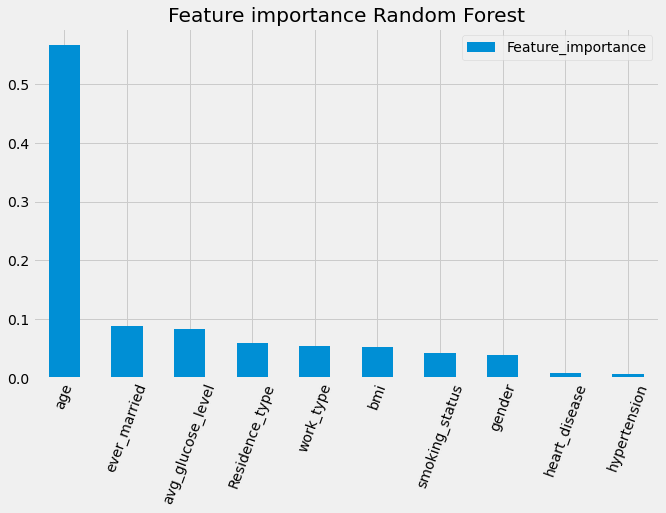

In [180]:
#feature importance
feature_score=pd.DataFrame(rf.feature_importances_, index=x.columns,
                           columns=['Feature_importance']).sort_values('Feature_importance',ascending=False)
plt.rcParams.update({'font.size':22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=70)
plt.title('Feature importance Random Forest')

In [183]:
#model comparision

model_compare=pd.DataFrame({'models':['DecisionTreeClassifier','RandomForestClassifier',
                                      'LogisticRegression','LinearDescriminentAnalysis','NaiveBayes'],
                            'f1_score':[dt_f1_score,rf_f1_score,lr_f1_score,LDA_f1_score,gb_f1_score],
                           'recall':[metrics.recall_score(y_test,dt.predict(x_test)),
                                     metrics.recall_score(y_test,rf.predict(x_test)),
                                     metrics.recall_score(y_test,lr.predict(x_test)),
                                     metrics.recall_score(y_test,LDA.predict(x_test)),
                                     metrics.recall_score(y_test,gb.predict(x_test))],
                           'Accuracy on train set':[dt_train_score,rf_train_score,lr_train_score,LDA_train_score,gb_train_score],
                           'Accuracy on test set':[dt_test_score,rf_test_score,lr_test_score,LDA_test_score,gb_test_score]})
model_compare=model_compare.sort_values('recall',ascending=False)


In [185]:
model_compare.style.background_gradient(cmap='Greens')

,models,f1_score,recall,Accuracy on train set,Accuracy on test set
4,NaiveBayes,0.195276,0.696629,0.796605,0.666667
3,LinearDescriminentAnalysis,0.244541,0.629213,0.813579,0.774299
2,LogisticRegression,0.243437,0.573034,0.819286,0.793216
0,DecisionTreeClassifier,0.266667,0.539326,0.863038,0.827789
1,RandomForestClassifier,0.256983,0.516854,0.871086,0.826484
